In [ ]:
import pandas as pd
from collections import Counter
import json

# Function to analyze top entities for a given president
def analyze_top_entities(file_path, president_name, top_n=10):

    df = pd.read_csv(file_path)

    person_counter = Counter()
    org_counter = Counter()
    loc_counter = Counter()

    for entities_json in df['entities']:
        entities = json.loads(entities_json)
        for entity in entities:
            if entity['label'] == 'PER':  # Person
                person_counter[entity['text']] += 1
            elif entity['label'] == 'ORG':  # Organization
                org_counter[entity['text']] += 1
            elif entity['label'] == 'LOC':  # Location
                loc_counter[entity['text']] += 1

    top_persons = person_counter.most_common(top_n)
    top_orgs = org_counter.most_common(top_n)
    top_locs = loc_counter.most_common(top_n)

    print(f"Top {top_n} persons for {president_name}: {top_persons}")
    print(f"Top {top_n} organizations for {president_name}: {top_orgs}")
    print(f"Top {top_n} locations for {president_name}: {top_locs}")
    print("\n")
president_files = {
    'Obama': '../flairData/ner_results_obama.csv',
    'Trump': '../flairData/ner_results_trump.csv',
    'Biden': '../flairData/ner_results_biden.csv'
}


for president_name, file_path in president_files.items():
    analyze_top_entities(file_path, president_name, top_n=10)

Top 10 persons for Obama: [('clinton', 66), ('Obama', 49), ('KERRY', 27), ('Clinton', 22), ('Kerry', 22), ('SARUKHAN', 14), ('Lavrov', 10), ('Tom', 8), ('Hillary Rodham Clinton', 8), ('LAVROV', 7)]
Top 10 organizations for Obama: [('State Department', 26), ('NATO', 22), ('Congress', 17), ('Department of State', 17), ('USAID', 16), ('ISIL', 15), ('UN', 12), ('U.S. Department of State', 10), ('United Nations', 9), ('OCO', 9)]
Top 10 locations for Obama: [('United States', 260), ('U.S.', 138), ('Cambodia', 93), ('China', 76), ('Mexico', 42), ('Iran', 36), ('Russia', 34), ('Syria', 34), ('Afghanistan', 29), ('Pakistan', 28)]


Top 10 persons for Trump: [('goldstein', 142), ('Pompeo', 71), ('Trump', 50), ('Maduro', 41), ('Michael R. Pompeo', 20), ('Brian', 19), ('Mattis', 14), ('ABRAMS', 11), ('Tillerson', 10), ('Lavrov', 9)]
Top 10 organizations for Trump: [('State Department', 68), ('UN', 67), ('STATE DEPARTMENT', 31), ('NATO', 30), ('ISIS', 26), ('UN Security Council', 25), ('Department 

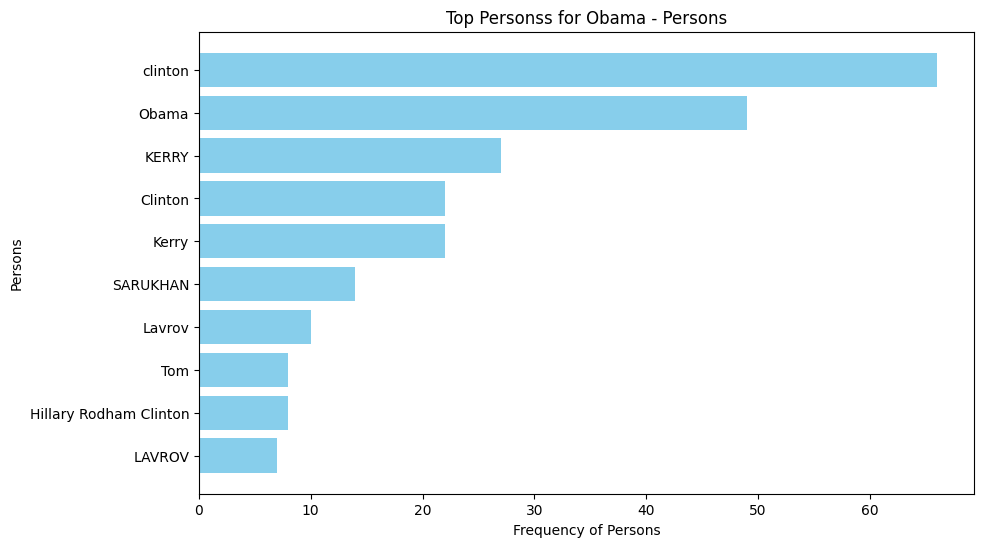

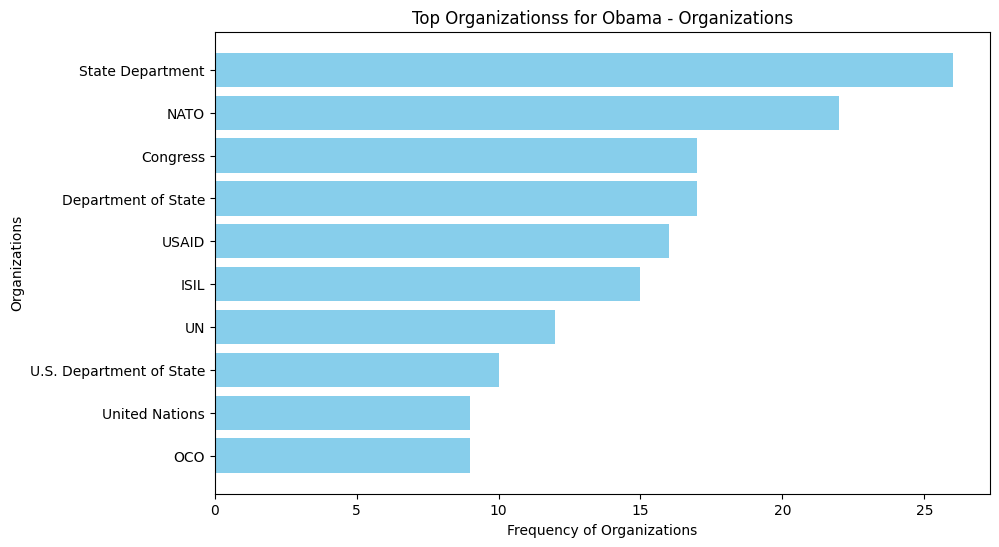

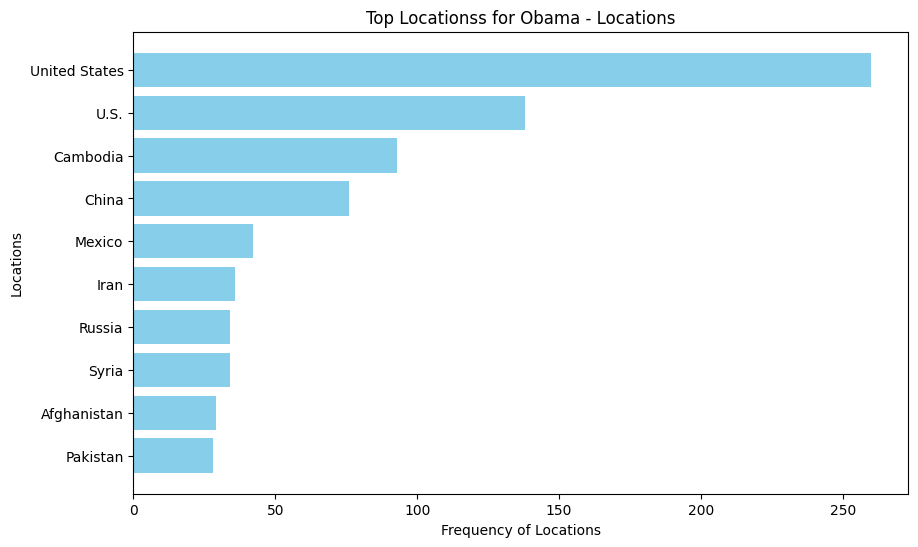

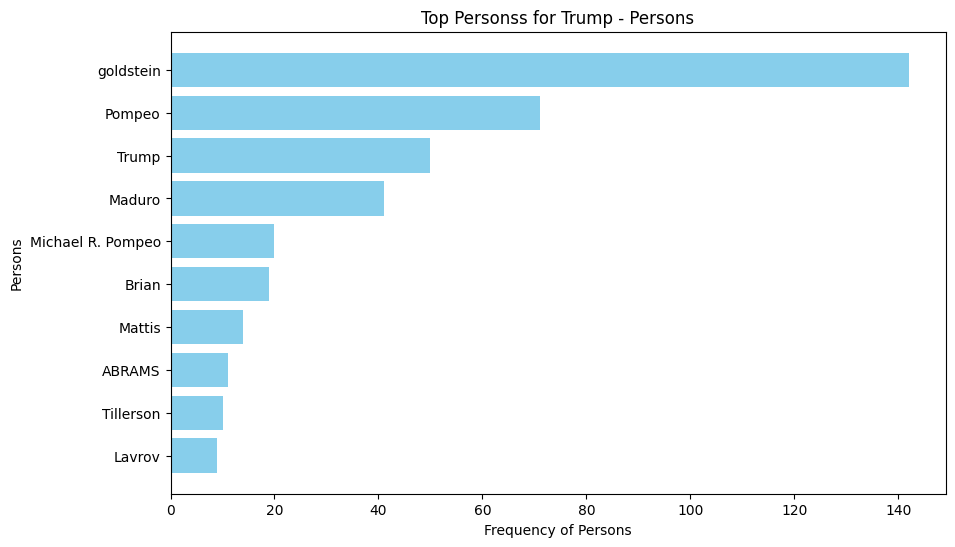

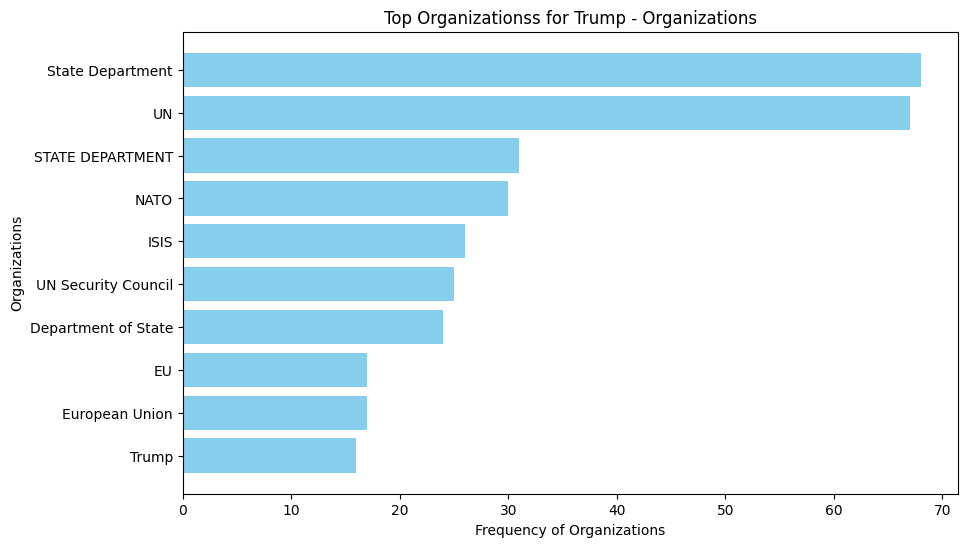

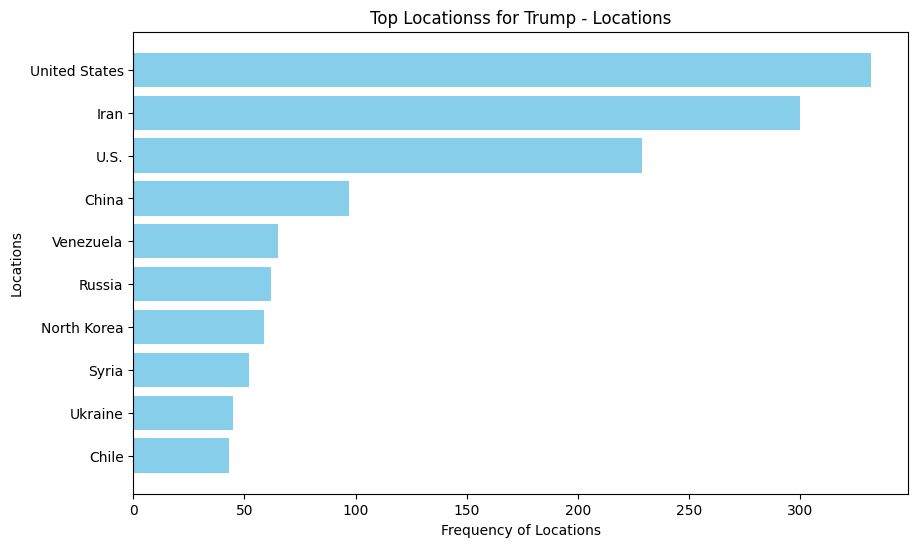

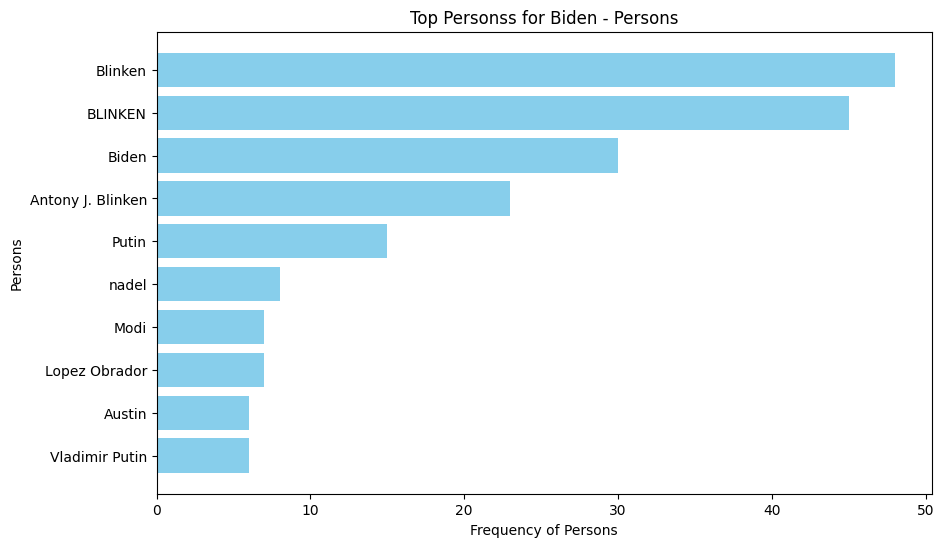

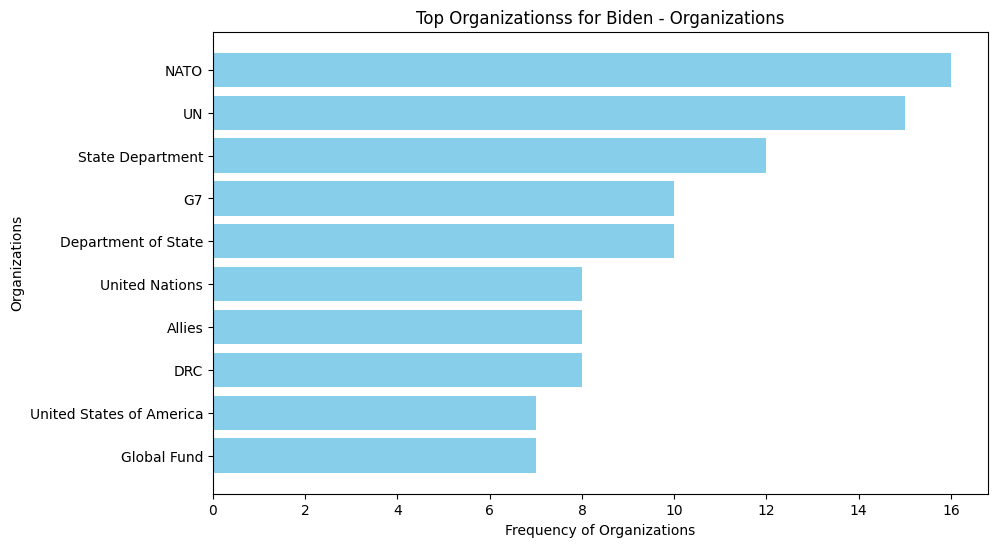

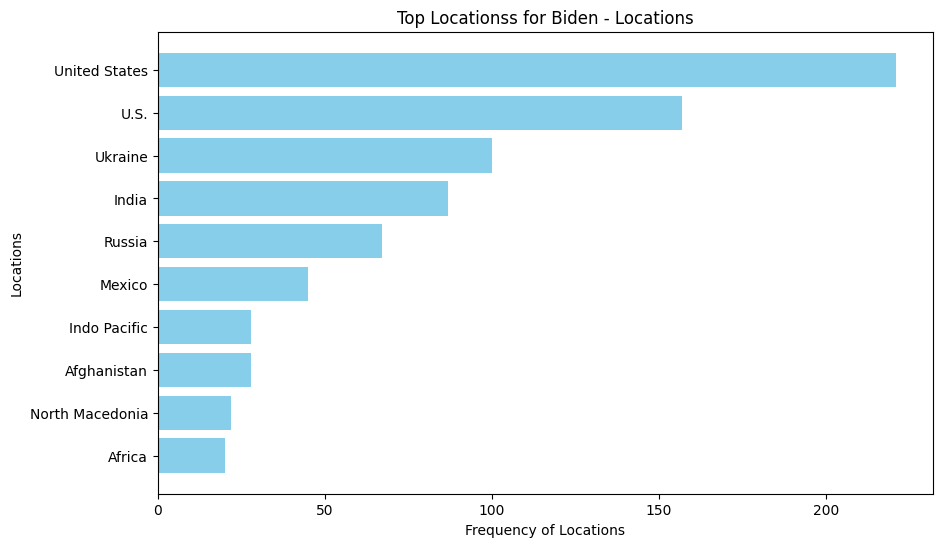

In [ ]:
import pandas as pd
from collections import Counter
import json
import matplotlib.pyplot as plt

# Function to analyze top entities for a given president
def analyze_top_entities(file_path, top_n=10):

    df = pd.read_csv(file_path)

    person_counter = Counter()
    org_counter = Counter()
    loc_counter = Counter()

    for entities_json in df['entities']:
        entities = json.loads(entities_json)
        for entity in entities:
            if entity['label'] == 'PER':  # Person
                person_counter[entity['text']] += 1
            elif entity['label'] == 'ORG':  # Organization
                org_counter[entity['text']] += 1
            elif entity['label'] == 'LOC':  # Location
                loc_counter[entity['text']] += 1

    # Get the top N most common entities for each type
    top_persons = person_counter.most_common(top_n)
    top_orgs = org_counter.most_common(top_n)
    top_locs = loc_counter.most_common(top_n)

    return top_persons, top_orgs, top_locs

# Function to plot the top entities
def plot_top_entities(entities, title, entity_type, president_name):
    labels, values = zip(*entities)
    plt.figure(figsize=(10, 6))
    plt.barh(labels, values, color='skyblue')
    plt.xlabel(f'Frequency of {entity_type}')
    plt.ylabel(entity_type)
    plt.title(f'Top {entity_type}s for {president_name} - {title}')
    plt.gca().invert_yaxis()  # To display the highest values at the top
    plt.show()
president_files = {\
    'Obama': '../flairData/ner_results_obama.csv',
    'Trump': '../flairData/ner_results_trump.csv',
    'Biden': '../flairData/ner_results_biden.csv'
}


for president_name, file_path in president_files.items():
    top_persons, top_orgs, top_locs = analyze_top_entities(file_path, top_n=10)
    

    plot_top_entities(top_persons, 'Persons', 'Persons', president_name)
    

    plot_top_entities(top_orgs, 'Organizations', 'Organizations', president_name)
    

    plot_top_entities(top_locs, 'Locations', 'Locations', president_name)

In [ ]:
import pandas as pd
from collections import Counter
import json

# Function to analyze entity type counts for a given president
def analyze_entity_types(file_path, president_name):

    df = pd.read_csv(file_path)

    entity_type_counter = Counter()

    for entities_json in df['entities']:
        entities = json.loads(entities_json)
        for entity in entities:
            entity_type_counter[entity['label']] += 1

    print(f"Entity type distribution for {president_name}:")
    print(f"Persons (PER): {entity_type_counter['PER']}")
    print(f"Organizations (ORG): {entity_type_counter['ORG']}")
    print(f"Locations (LOC): {entity_type_counter['LOC']}")
    print("\n")

president_files = {
    'Obama': '../flairData/ner_results_obama.csv',
    'Trump': '../flairData/ner_results_trump.csv',
    'Biden': '../flairData/ner_results_biden.csv'
}

for president_name, file_path in president_files.items():
    analyze_entity_types(file_path, president_name)

Entity type distribution for Obama:
Persons (PER): 667
Organizations (ORG): 715
Locations (LOC): 1648


Entity type distribution for Trump:
Persons (PER): 1038
Organizations (ORG): 1067
Locations (LOC): 2372


Entity type distribution for Biden:
Persons (PER): 513
Organizations (ORG): 554
Locations (LOC): 1359


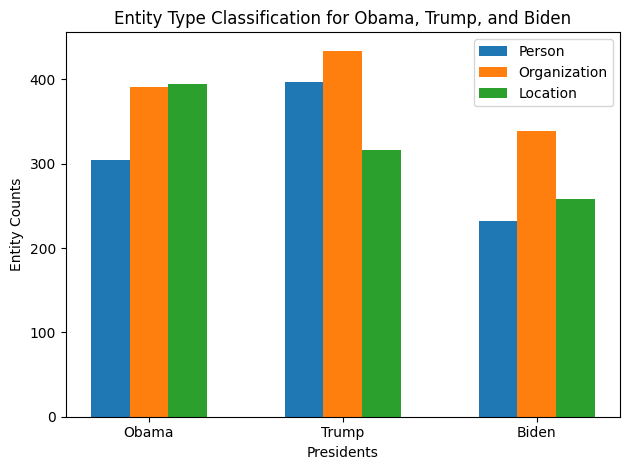

In [ ]:
#Comparative analysis

import pandas as pd
from collections import Counter
import json
import matplotlib.pyplot as plt

# Function to analyze entity types for a given president
def analyze_entity_types(file_path):

    df = pd.read_csv(file_path)

    person_counter = Counter()
    org_counter = Counter()
    loc_counter = Counter()

    for entities_json in df['entities']:
        entities = json.loads(entities_json)
        for entity in entities:
            if entity['label'] == 'PER':  # Person
                person_counter[entity['text']] += 1
            elif entity['label'] == 'ORG':  # Organization
                org_counter[entity['text']] += 1
            elif entity['label'] == 'LOC':  # Location
                loc_counter[entity['text']] += 1

    return len(person_counter), len(org_counter), len(loc_counter)

president_files = {
    'Obama': '../flairData/ner_results_obama.csv',
    'Trump': '../flairData/ner_results_trump.csv',
    'Biden': '../flairData/ner_results_biden.csv'
}

entity_counts = {
    'Person': [],
    'Organization': [],
    'Location': []
}

presidents = list(president_files.keys())

for president_name, file_path in president_files.items():
    person_count, org_count, loc_count = analyze_entity_types(file_path)
    entity_counts['Person'].append(person_count)
    entity_counts['Organization'].append(org_count)
    entity_counts['Location'].append(loc_count)

bar_width = 0.2
index = range(len(presidents))

plt.bar(index, entity_counts['Person'], bar_width, label='Person')
plt.bar([i + bar_width for i in index], entity_counts['Organization'], bar_width, label='Organization')
plt.bar([i + bar_width * 2 for i in index], entity_counts['Location'], bar_width, label='Location')

plt.xlabel('Presidents')
plt.ylabel('Entity Counts')
plt.title('Entity Type Classification for Obama, Trump, and Biden')
plt.xticks([i + bar_width for i in index], presidents)

plt.legend()
plt.tight_layout()
plt.show()

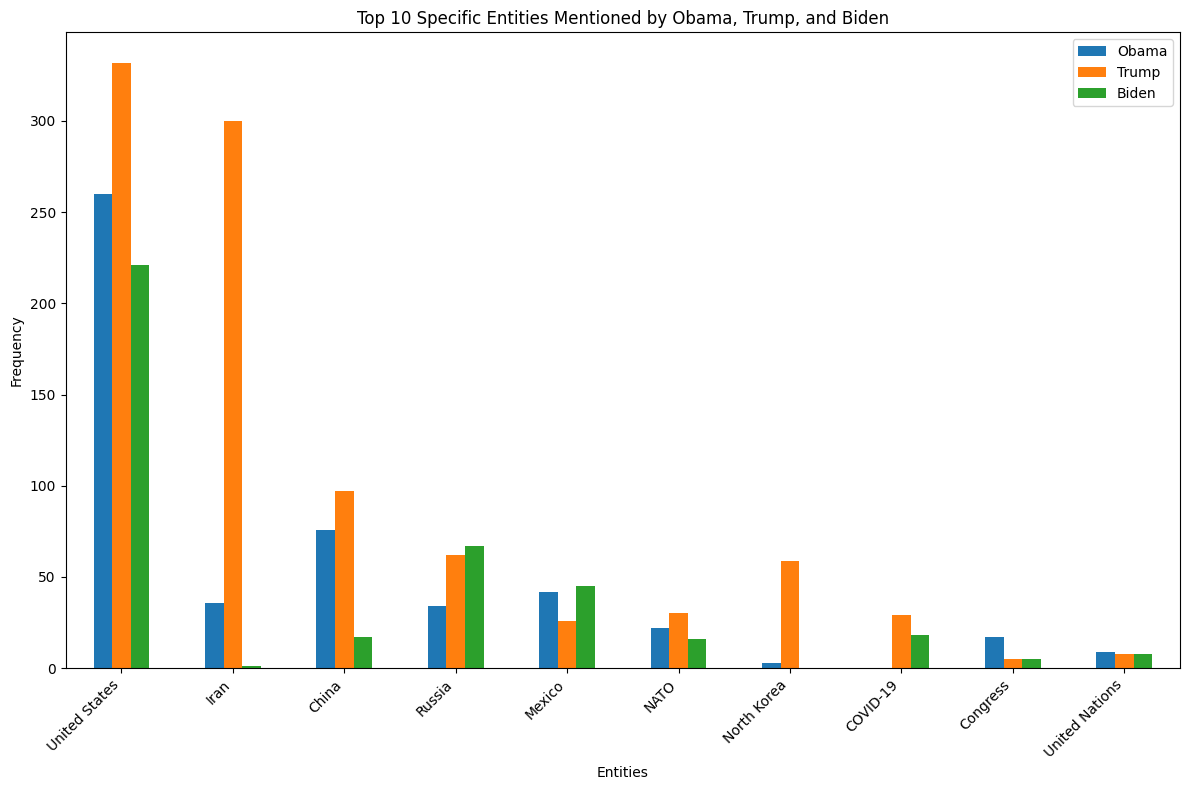

In [ ]:
import pandas as pd
from collections import Counter
import json
import matplotlib.pyplot as plt
import numpy as np

# List of specific entities for comparison
specific_entities = [
    'United States', 'China', 'Russia', 'Congress', 'Barack Obama', 'Joe Biden', 'Donald Trump',  # Initial list

    # Countries and international organizations
    'North Korea', 'Iran', 'United Nations', 'NATO', 'European Union', 'Israel', 'Mexico', 'Saudi Arabia',

    # Key domestic institutions and actors
    'Supreme Court', 'Republican Party', 'Democratic Party', 'FBI', 'CIA', 'Senate', 'House of Representatives',
    
    # Political figures and leaders
    'Hillary Clinton', 'Vladimir Putin', 'Xi Jinping', 'Angela Merkel', 'Kim Jong-un', 'Benjamin Netanyahu',

    # Economic topics
    'Federal Reserve', 'Wall Street', 'Healthcare', 'Tax Reform', 'Trade War', 'Unemployment', 'Jobs', 'Economy',

    # Major issues
    'Climate Change', 'Immigration', 'Gun Control', 'Racial Justice', 'COVID-19', 'Terrorism', 'Healthcare Reform',

    # Key international agreements and treaties
    'Paris Agreement', 'Iran Nuclear Deal', 'USMCA', 'Trans-Pacific Partnership',

    # Specific policies and events
    'Obamacare', 'DACA', 'Build Back Better', 'Infrastructure', 'Border Wall', 'Travel Ban'
]

# Function to count occurrences of specific entities in the NER results
def count_specific_entities(file_path, president_name, specific_entities):

    df = pd.read_csv(file_path)
    
    entity_counter = Counter()

    for entities_json in df['entities']:
        entities = json.loads(entities_json)
        for entity in entities:
            if entity['text'] in specific_entities:
                entity_counter[entity['text']] += 1
    
    return entity_counter

president_files = {
    'Obama': '../flairData/ner_results_obama.csv',
    'Trump': '../flairData/ner_results_trump.csv',
    'Biden': '../flairData/ner_results_biden.csv'
}

president_entity_counts = {}
for president_name, file_path in president_files.items():
    entity_count = count_specific_entities(file_path, president_name, specific_entities)
    president_entity_counts[president_name] = entity_count

entity_df = pd.DataFrame(president_entity_counts).fillna(0)

entity_df['Total'] = entity_df.sum(axis=1)
entity_df = entity_df.sort_values(by='Total', ascending=False).drop(columns='Total')

top_entities = 10
fig, ax = plt.subplots(figsize=(12, 8))

entity_df.head(top_entities).plot(kind='bar', ax=ax)
ax.set_title('Top 10 Specific Entities Mentioned by Obama, Trump, and Biden')
ax.set_xlabel('Entities')
ax.set_ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# COMPARATIVE ANALYSIS

import pandas as pd
import json
from collections import Counter

# Function to load and extract entities from the CSV file
def load_entities(ner_file):
    df = pd.read_csv(ner_file)
    all_entities = []
    
    for entities_str in df['entities']:
        if pd.notna(entities_str):
            entities = json.loads(entities_str)
            for entity in entities:
                all_entities.append(entity['text'].lower())  # Convert to lowercase for standardization
    
    return all_entities

# Function to count the frequency of each entity
def count_entities(entities):
    return Counter(entities)

# Function to compare top entities across presidents
def compare_entities(obama_entities, trump_entities, biden_entities, top_n=10):
    obama_counter = count_entities(obama_entities)
    trump_counter = count_entities(trump_entities)
    biden_counter = count_entities(biden_entities)
    
    obama_top = obama_counter.most_common(top_n)
    trump_top = trump_counter.most_common(top_n)
    biden_top = biden_counter.most_common(top_n)

    comparison_df = pd.DataFrame({
        'Obama': dict(obama_top),
        'Trump': dict(trump_top),
        'Biden': dict(biden_top)
    }).fillna(0)  # Fill missing values with 0
    
    return comparison_df

obama_entities = load_entities('../flairData/ner_results_obama.csv')
trump_entities = load_entities('../flairData/ner_results_trump.csv')
biden_entities = load_entities('../flairData/ner_results_biden.csv')

comparison_df = compare_entities(obama_entities, trump_entities, biden_entities, top_n=10)

print(comparison_df)

                  Obama  Trump  Biden
united states     260.0  333.0  221.0
u.s.              140.0  231.0  161.0
cambodia           94.0    0.0    0.0
clinton            88.0    0.0    0.0
china              76.0   97.0    0.0
obama              49.0    0.0    0.0
kerry              49.0    0.0    0.0
american           47.0   83.0    0.0
mexico             42.0    0.0   45.0
iran               37.0  300.0    0.0
goldstein           0.0  142.0    0.0
state department    0.0   99.0    0.0
iranian             0.0   92.0    0.0
pompeo              0.0   73.0    0.0
trump               0.0   70.0    0.0
ukraine             0.0    0.0  101.0
blinken             0.0    0.0   93.0
india               0.0    0.0   89.0
russia              0.0    0.0   67.0
biden               0.0    0.0   30.0
indo pacific        0.0    0.0   28.0
afghanistan         0.0    0.0   28.0
